In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from astropy.cosmology import WMAP9
from astropy.cosmology import FlatLambdaCDM

/tmp/ipykernel_8100/2862726055.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
Omega_l_real = 0.73
M = -19
H0_units = WMAP9.H(0)
H0 = H0_units.value
print(H0)

69.32


In [3]:
datos = np.loadtxt ('perlmutter.txt', comments='#')
z=[]
m = []
for i in datos:
    z.append(i[0])
    m.append(i[1])
#otra opcion z=datos[:,0] todos los datos de la primer columna
print(np.size(z))

60


Text(0, 0.5, 'Effective Magnitude')

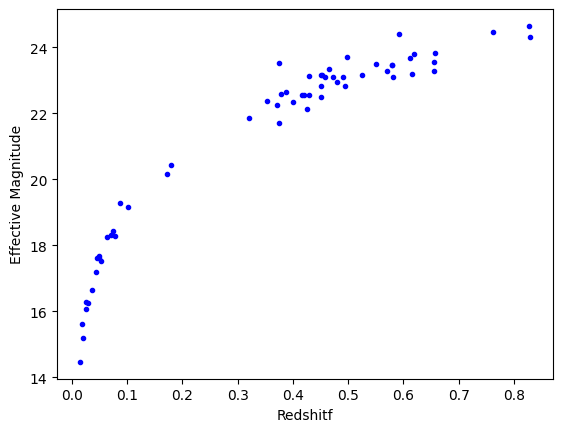

In [4]:
plt.plot (z, m, 'b.')
plt.grid()
plt.xlabel('Redshitf')
plt.ylabel('Effective Magnitude')

In [11]:
def model (params, M, z):
    def distanciaLuminosa (z):
        cosmo = FlatLambdaCDM(H0=70, Tcmb0=2.725, Om0=1-OLambda)
        return cosmo.luminosity_distance(z).value
    OLambda = params
    dist = distanciaLuminosa(z)
    return M + 5*np.log10(dist*100000)

In [6]:
def chi_square(params, M, m, z):
    y_model = model(params, M, z)
    chi_square = np.sum((m - y_model) ** 2)
    return chi_square

In [12]:
guess = 0.5
result = minimize(chi_square, guess, args=(M, m, z))

res = result.x

print("Best-fit:")
print("Omega Lambda: ", res)
print(':D')

Best-fit:
Omega Lambda:  [0.50383572]
:D
